We're going to have a crack at calculating some spatial harmonics stuff.

Arnould et al. (2018) produced beautiful 'spherical harmonic degree' plots. However, to derive these in finite elements is not trivial. Their approach (taken over a sphere) was to sample the fourier spectrum of the target function over a large number of great circles

In [309]:
import sys
sys.path.append('..')

In [310]:
import planetengine
import modelscripts

In [311]:
system = modelscripts.isovisc_systemscript.build(Ra = 1e4, aspect = 2., res = 16)

In [312]:
initial = {
    'temperatureField': {'IC': planetengine.initials.sinusoidal.IC(freq = 11)}
    }
planetengine.initials.apply(initial, system)

From wiki: 

"In mathematics, the discrete Fourier transform (DFT) converts a finite sequence of equally-spaced samples of a function into a same-length sequence of equally-spaced samples of the discrete-time Fourier transform (DTFT), which is a complex-valued function of frequency. The interval at which the DTFT is sampled is the *reciprocal of the duration of the input sequence*." - but in our case 'duration' is actually spatial separation; i.e. if the upper length was 100 km, the DTFT would be sampled at 0.01 'per-km' - I guess?

In [313]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fitted 1 variables to the figure.



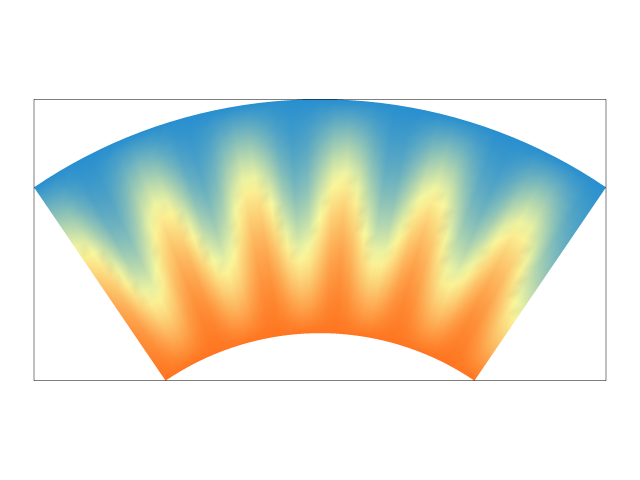

In [314]:
planetengine.quickShow(system.temperatureField)

In [315]:
Nus = system.temperatureField.fn_gradient[1].evaluate(system.outer)
Nus = (Nus - np.average(Nus)) / np.average(Nus)
sp = np.abs(np.fft.rfft(Nus, axis = 0))
freq = np.fft.rfftfreq(Nus.size, 1. / (2. * sp.size))
domFreq = max(zip(sp[:,0], freq))[1]￼

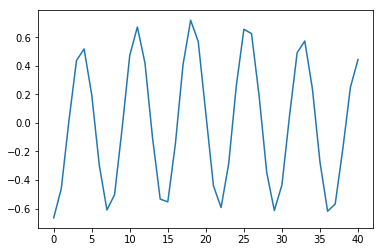

In [316]:
plt.plot(Nus)
plt.show()

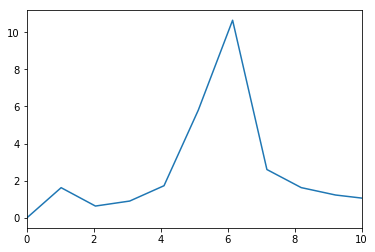

In [317]:
plt.plot(freq, sp)
plt.xlim(0., 10.)
plt.show()

In [318]:
domFreqs = []
times = []
for i in range(1000):
    system.iterate()
    Nus = system.temperatureField.fn_gradient[1].evaluate(system.outer)
    Nus = (Nus - np.average(Nus)) / np.average(Nus)
    sp = np.abs(np.fft.rfft(Nus, axis = 0))
    freq = np.fft.rfftfreq(Nus.size, 1. / (2. * sp.size))
    domFreq = max(zip(sp[:,0], freq))[1]
    times.append(system.modeltime.value)
    domFreqs.append(domFreq)

Fitted 1 variables to the figure.



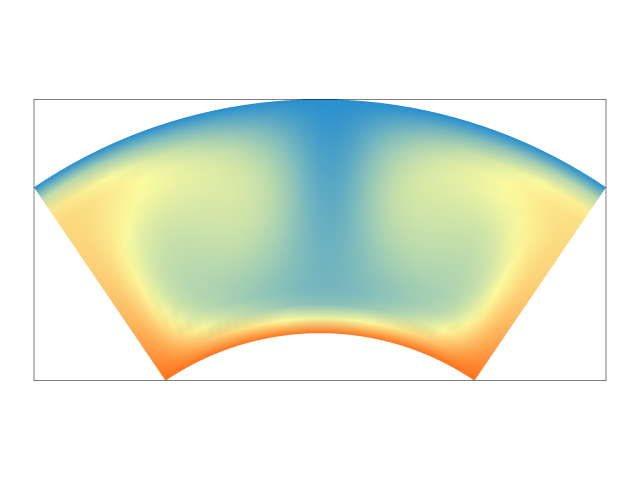

In [319]:
planetengine.quickShow(system.temperatureField)

In [320]:
Nus = system.temperatureField.fn_gradient[1].evaluate(system.outer)
Nus = (Nus - np.average(Nus)) / np.average(Nus)
sp = np.abs(np.fft.rfft(Nus, axis = 0))
freq = np.fft.rfftfreq(Nus.size, 1. / (2. * sp.size))

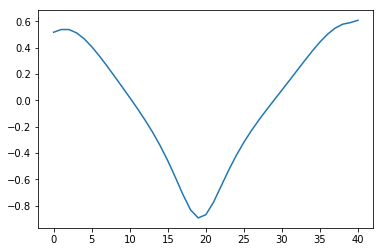

In [321]:
plt.plot(Nus)
plt.show()

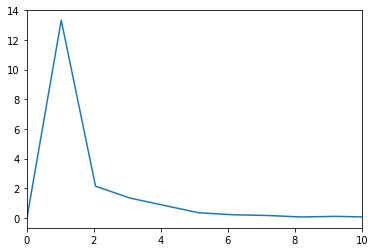

In [322]:
plt.plot(freq, sp)
plt.xlim(0., 10.)
plt.show()

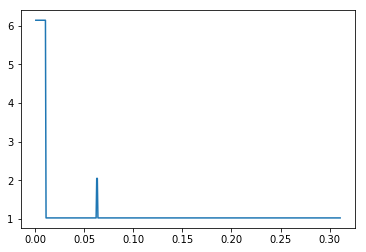

In [323]:
plt.plot(times, domFreqs)
plt.show()

In [ ]:
from IPython.display import Audio
Audio('bird.wav')

In [ ]:
from scipy.io import wavfile

rate, audio = wavfile.read('bird.wav')

audio = np.mean(audio, axis=1)

In [ ]:
plt.plot(audio)

In [ ]:
sp = np.abs(np.fft.fftshift(np.fft.rfft(audio, axis = 0)))
freq = np.fft.fftshift(np.fft.fftfreq(sp.size))

In [ ]:
plt.plot(freq, sp)
plt.show()

In [ ]:
from scipy import signal

freqs, times, Sx = signal.spectrogram(
    audio,
    fs = rate,
    window = 'hanning',
    nperseg = 1024,
    noverlap = 1024 - 100,
    detrend = False,
    scaling = 'spectrum'
    )

f, ax = plt.subplots(figsize = (10, 4))
ax.pcolormesh(
    times,
    freqs / 1000, 10 * np.log10(Sx),
    cmap = 'viridis'
    )
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');